# Imports and reading data

In [9]:
import os
import pandas as pd
from ydata_profiling import ProfileReport

DATA_FOLDER = "data"
CRM_PATH = os.path.join(DATA_FOLDER, "crm_data.csv")
WEB_TRACKING_PATH = os.path.join(DATA_FOLDER, "web_tracking.csv")

In [10]:
crm_df = pd.read_csv(CRM_PATH)
web_tracking_df = pd.read_csv(WEB_TRACKING_PATH)

# EDA + Data validation

In [11]:
crm_df#.columns

,user_id,lead_status,company,sign_up_date,industry,country
0,137,Converted,Company_0,2024-03-09,Healthcare,US
1,163,Converted,Company_1,2024-03-01,Finance,UK
2,103,Prospect,Company_2,2024-03-02,Healthcare,France
3,163,Lost,Company_3,2024-03-01,SaaS,US
4,171,Lost,Company_4,2024-03-07,Healthcare,Germany
5,151,Converted,Company_5,2024-03-01,Finance,US
6,141,Prospect,Company_6,2024-03-02,E-commerce,Germany
7,117,Lost,Company_7,2024-03-08,Finance,France
8,114,Lost,Company_8,2024-03-09,Finance,UK
9,171,Prospect,Company_9,2024-03-10,Finance,US


In [12]:
crm_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   user_id       60 non-null     int64 
 1   lead_status   60 non-null     object
 2   company       60 non-null     object
 3   sign_up_date  60 non-null     object
 4   industry      60 non-null     object
 5   country       60 non-null     object
dtypes: int64(1), object(5)
memory usage: 2.9+ KB


In [13]:
crm_df.isna().sum()

user_id         0
lead_status     0
company         0
sign_up_date    0
industry        0
country         0
dtype: int64

In [66]:
crm_df.nunique()

user_id         47
lead_status      3
company         47
sign_up_date    11
industry         4
country          4
dtype: int64

**Warning:** user_id is not unique

In [67]:
crm_df["sign_up_date"] = pd.to_datetime(crm_df["sign_up_date"])

In [68]:
crm_df.sort_values("sign_up_date", inplace=True)

In [69]:
crm_df.drop_duplicates(subset='user_id', keep="last", inplace=True)

In [70]:
crm_df["sign_up_date"].describe()

count                               47
mean     2024-03-06 07:39:34.468084992
min                2024-03-01 00:00:00
25%                2024-03-03 00:00:00
50%                2024-03-07 00:00:00
75%                2024-03-09 12:00:00
max                2024-03-11 00:00:00
Name: sign_up_date, dtype: object

In [71]:
crm_df[crm_df.user_id.duplicated()] 

,user_id,lead_status,company,sign_up_date,industry,country


In [72]:
def plot_column_distribution(df, col_name):
    result = df[col_name].value_counts()
    print(result)
    return result.plot(kind = "bar")

lead_status
Converted    20
Lost         15
Prospect     12
Name: count, dtype: int64


<Axes: xlabel='lead_status'>

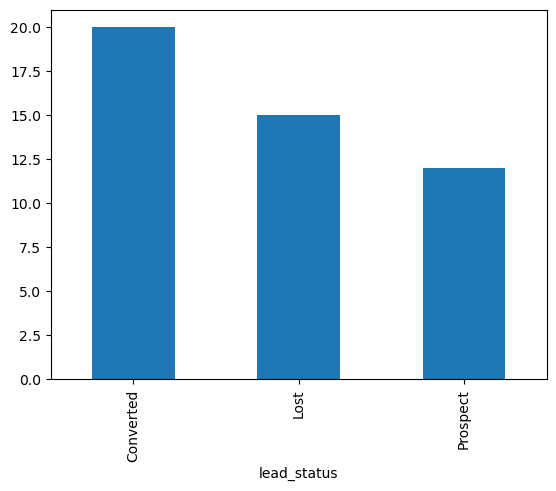

In [73]:
plot_column_distribution(crm_df, "lead_status")

In [74]:
(crm_df["lead_status"] == "Converted").sum() / len(crm_df)

0.425531914893617

industry
Finance       15
E-commerce    14
SaaS          12
Healthcare     6
Name: count, dtype: int64


<Axes: xlabel='industry'>

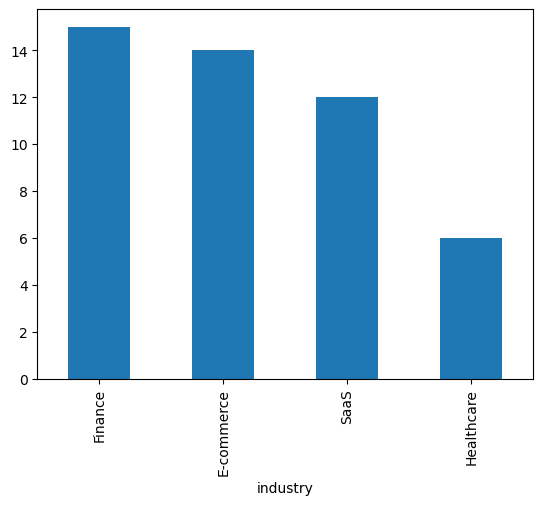

In [75]:
plot_column_distribution(crm_df, "industry")

country
US         23
UK         11
Germany    10
France      3
Name: count, dtype: int64


<Axes: xlabel='country'>

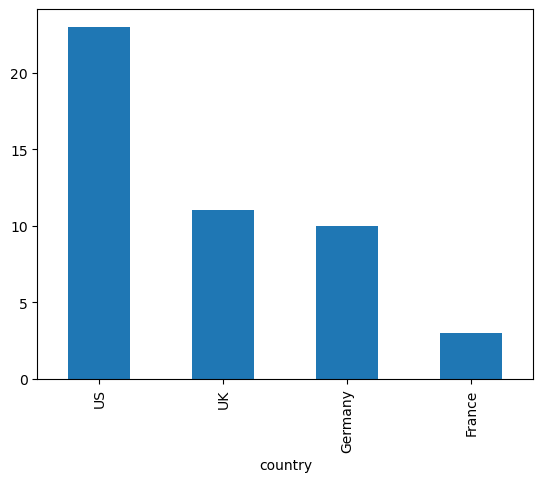

In [76]:
plot_column_distribution(crm_df, "country")

- There are three options for lead_status: ("converted", "lost", "prospect")
- lead_status = "converted" is the most likely to appear with 25 incides (42%)
- The largest groups of web activity:
    - Industry: Finance (22)
    - Country: US (27)
- The smallest groups of web activity:
    - Industry: Healthcare (9)
    - Country: France (7) 

In [77]:
def get_conversion_rate(values, prospects = True):
    # print(values)
    num_converted = values[values == "Converted"].shape[0]
    if prospects:
        total = values.shape[0]
    else:
        total = values[values != "Prospect"].shape[0]
    percentage = num_converted / total * 100
    return percentage
    # converted = values[values["lead_status"] == "Converted"].shape[0]

In [78]:
def plot_conversion_rate_by_column(df, col_name, prospects = True):
    conv_rate = df.groupby(col_name)["lead_status"].apply(lambda x: get_conversion_rate(x, prospects))
    sorted_conv_rates = conv_rate.sort_values(ascending = False)
    print(sorted_conv_rates)
    return sorted_conv_rates.plot(kind = "bar")

country
US         56.521739
UK         36.363636
France     33.333333
Germany    20.000000
Name: lead_status, dtype: float64


<Axes: xlabel='country'>

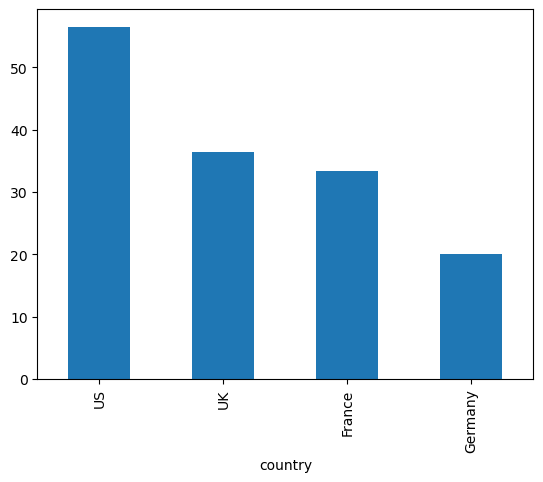

In [79]:
plot_conversion_rate_by_column(crm_df, "country")

industry
Healthcare    83.333333
SaaS          41.666667
E-commerce    35.714286
Finance       33.333333
Name: lead_status, dtype: float64


<Axes: xlabel='industry'>

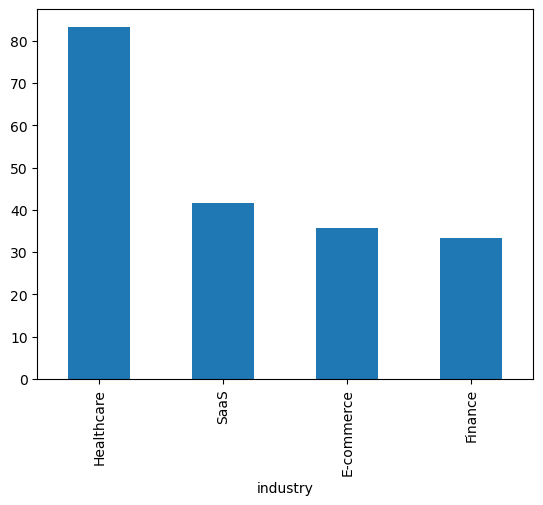

In [80]:
plot_conversion_rate_by_column(crm_df, "industry")

- The US has highest conversion rate (59%) in contrast to France with the lowest (14%)
- Healthcare has highest conversion rate (55%) in contrast to E-commerce (36%)
- **NOTE:** This conversion rate calculation also includes lead_status = "prospects"

industry
Healthcare    83.333333
SaaS          62.500000
E-commerce    50.000000
Finance       45.454545
Name: lead_status, dtype: float64


<Axes: xlabel='industry'>

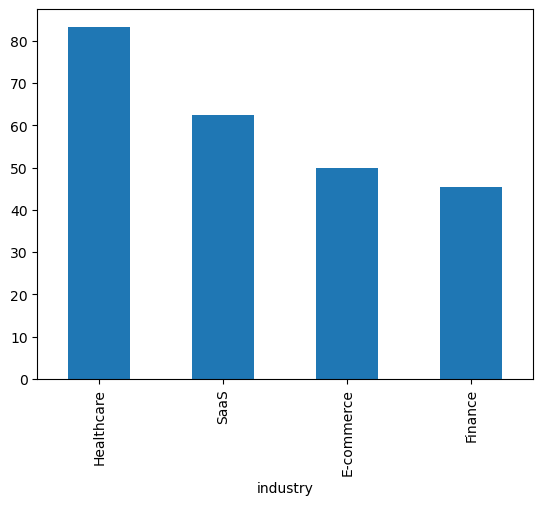

In [81]:
plot_conversion_rate_by_column(crm_df, "industry", prospects = False)

country
US         68.421053
UK         57.142857
France     33.333333
Germany    33.333333
Name: lead_status, dtype: float64


<Axes: xlabel='country'>

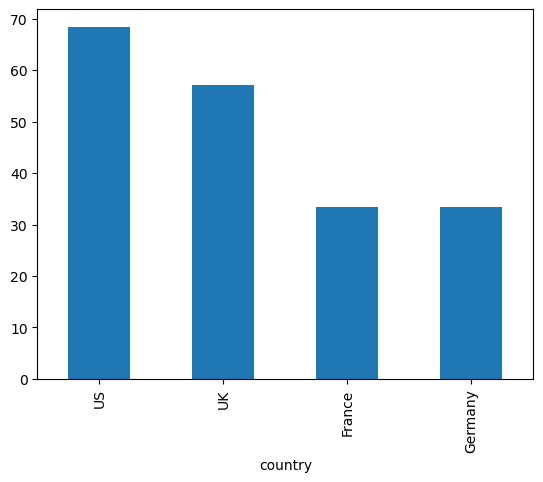

In [82]:
plot_conversion_rate_by_column(crm_df, "country", prospects = False)

- findings change drastically by not including lead_status = "Prospect"
    - Industry: Conversion rate differences are less between industries (ranges from 51% (E-commerce) to 71% (Healthcare)
    - Country: The lowest country now is Germany with 25% and US with increased conversionrate of 69%

# Web Tracking Data

In [83]:
web_tracking_df.columns

Index(['user_id', 'session_id', 'timestamp', 'page', 'time_spent_sec',
       'utm_source', 'utm_medium', 'device_type'],
      dtype='object')

In [84]:
web_tracking_df.head()

,user_id,session_id,timestamp,page,time_spent_sec,utm_source,utm_medium,device_type
34,159,s034,2024-03-01 01:18:00,/features,90,google,organic,mobile
36,114,s036,2024-03-01 01:28:00,/contact,122,newsletter,cpc,mobile
90,171,s090,2024-03-01 01:45:00,/contact,217,google,referral,desktop
97,181,s097,2024-03-01 03:04:00,/contact,84,google,organic,mobile
82,133,s082,2024-03-01 04:29:00,/pricing,263,newsletter,cpc,mobile


In [85]:
web_tracking_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 34 to 39
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   user_id         100 non-null    int64         
 1   session_id      100 non-null    object        
 2   timestamp       100 non-null    datetime64[ns]
 3   page            100 non-null    object        
 4   time_spent_sec  100 non-null    int64         
 5   utm_source      100 non-null    object        
 6   utm_medium      100 non-null    object        
 7   device_type     100 non-null    object        
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 7.0+ KB


In [86]:
web_tracking_df["timestamp"] = pd.to_datetime(web_tracking_df["timestamp"])

In [87]:
web_tracking_df.time_spent_sec.describe()

count    100.000000
mean     163.750000
std       71.941106
min       11.000000
25%      121.750000
50%      156.500000
75%      227.500000
max      295.000000
Name: time_spent_sec, dtype: float64

In [88]:
web_tracking_df.timestamp.describe()

count                              100
mean     2024-03-04 12:31:25.199999744
min                2024-03-01 01:18:00
25%                2024-03-02 18:32:15
50%                2024-03-04 16:09:30
75%                2024-03-06 04:45:15
max                2024-03-07 21:13:00
Name: timestamp, dtype: object

**NOTE:** Web tracking until 03-07, but users signed up until 03-10

<Axes: ylabel='Frequency'>

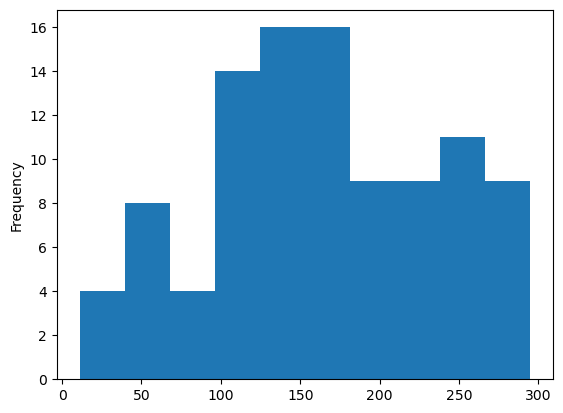

In [89]:
web_tracking_df.time_spent_sec.plot(kind= "hist")

In [90]:
web_tracking_df.nunique()

user_id            61
session_id        100
timestamp          99
page                4
time_spent_sec     74
utm_source          4
utm_medium          4
device_type         3
dtype: int64

**Warning:** Some users are missing in the crm

In [91]:
set(web_tracking_df["user_id"]) - set(crm_df["user_id"])

{101, 105, 113, 129, 133, 135, 139, 148, 153, 172, 175, 179, 182, 186}

**NOTE:** user_id {101, 105, 113, 129, 133, 135, 139, 148, 153, 172, 175, 179, 182, 186} have web tracking data but are missing for crm

In [92]:
web_tracking_df.isna().sum()

user_id           0
session_id        0
timestamp         0
page              0
time_spent_sec    0
utm_source        0
utm_medium        0
device_type       0
dtype: int64

In [93]:
web_tracking_df.sort_values("timestamp", inplace = True)

In [94]:
web_tracking_df[web_tracking_df["user_id"] == 161]

,user_id,session_id,timestamp,page,time_spent_sec,utm_source,utm_medium,device_type
37,161,s037,2024-03-01 06:29:00,/contact,11,facebook,referral,tablet
40,161,s040,2024-03-03 18:03:00,/contact,63,facebook,email,tablet
38,161,s038,2024-03-04 18:03:00,/pricing,139,facebook,cpc,tablet
93,161,s093,2024-03-06 17:50:00,/features,63,google,referral,mobile
84,161,s084,2024-03-07 03:22:00,/features,46,google,cpc,tablet


In [95]:
nb_of_pages_visited = web_tracking_df.user_id.value_counts()
nb_of_pages_visited_df = nb_of_pages_visited.to_frame().reset_index()
nb_of_pages_visited_df.rename(columns = {"count":"numb_pages"}, inplace = True)

In [96]:
nb_of_pages_visited

user_id
161    5
159    4
101    4
120    3
114    3
      ..
149    1
154    1
138    1
105    1
173    1
Name: count, Length: 61, dtype: int64

In [97]:
def get_last_page(x):
    last_page = x.to_list()[-1]
    return last_page

In [98]:
last_page = web_tracking_df.groupby('user_id').page.apply(get_last_page)

In [99]:
last_page_df = last_page.to_frame().reset_index()
last_page_df.rename(columns = {"page":"last_page"}, inplace=True)

In [100]:
def get_first_page(x):
    first_page = x.to_list()[0]
    return first_page

In [101]:
first_page = web_tracking_df.groupby('user_id').page.apply(get_first_page)

In [102]:
first_page_df = first_page.to_frame().reset_index()
first_page_df.rename(columns = {"page":"first_page"}, inplace=True)

In [103]:
merged_df = crm_df.merge(last_page_df, on = "user_id")\
            .merge(first_page_df, on = "user_id")\
            .merge(nb_of_pages_visited_df, on = "user_id")

In [104]:
merged_df

,user_id,lead_status,company,sign_up_date,industry,country,last_page,first_page,numb_pages
0,184,Prospect,Company_18,2024-03-01,Finance,US,/features,/features,1
1,163,Lost,Company_3,2024-03-01,SaaS,US,/features,/pricing,2
2,199,Converted,Company_32,2024-03-01,Healthcare,US,/landing,/features,2
3,151,Converted,Company_5,2024-03-01,Finance,US,/pricing,/pricing,1
4,191,Prospect,Company_42,2024-03-01,SaaS,Germany,/pricing,/contact,2
5,162,Lost,Company_12,2024-03-01,Finance,Germany,/contact,/contact,1
6,106,Prospect,Company_49,2024-03-01,Finance,Germany,/features,/features,1
7,107,Prospect,Company_19,2024-03-01,E-commerce,US,/features,/features,1
8,154,Lost,Company_11,2024-03-01,Finance,US,/features,/features,1
9,141,Prospect,Company_6,2024-03-02,E-commerce,Germany,/landing,/landing,1


last_page
/pricing     57.142857
/landing     53.846154
/features    36.842105
/contact     25.000000
Name: lead_status, dtype: float64


<Axes: xlabel='last_page'>

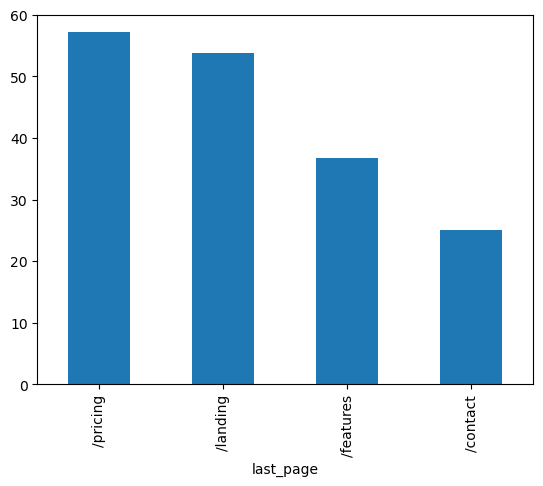

In [105]:
plot_conversion_rate_by_column(merged_df, "last_page")

- if a user ends on contact page he/she does not converse in 3 out of 4 cases
- if a user ends on pricing page he/she converse in 54% of the cases

first_page
/landing     63.636364
/pricing     57.142857
/features    47.058824
/contact      8.333333
Name: lead_status, dtype: float64


<Axes: xlabel='first_page'>

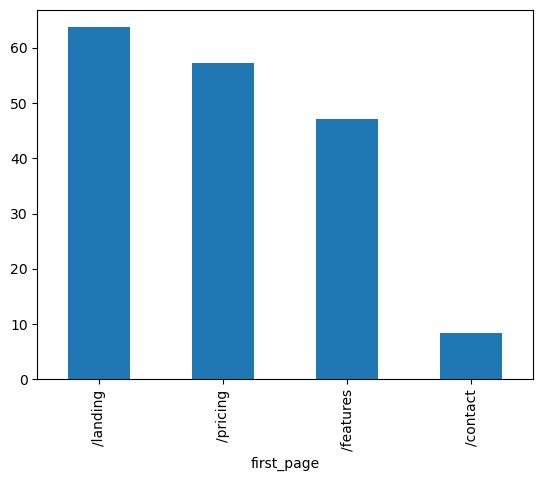

In [106]:
plot_conversion_rate_by_column(merged_df, "first_page")

In [113]:
merged_df.numb_pages.value_counts()

numb_pages
1    24
2    17
3     4
4     1
5     1
Name: count, dtype: int64

numb_pages
4    100.000000
5    100.000000
1     45.833333
2     35.294118
3     25.000000
Name: lead_status, dtype: float64


<Axes: xlabel='numb_pages'>

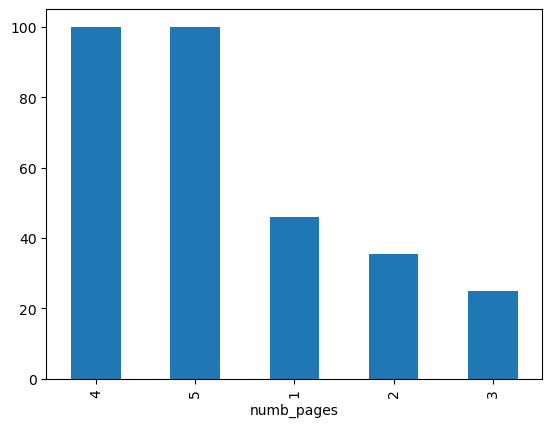

In [108]:
plot_conversion_rate_by_column(merged_df, "numb_pages")

In [96]:
# pandas profiling
crm_profile = ProfileReport(crm_df, 
                            title="CRM Data Profiling Report", 
                            explorative=True)
web_tracking_profile = ProfileReport(web_tracking_df, 
                                     title="Web Tracking Data Profiling Report", 
                                     explorative=True)
crm_profile.to_file("crm_data_profile.html")
web_tracking_profile.to_file("web_tracking_data_profile.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 7/7 [00:00<00:00, 78.61it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 8/8 [00:00<00:00, 109.50it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]